# Erasmus Neural Networks
http://michalbereta.pl/nn
## RBF Networks (Radial basis function networks)


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### RBF network - class design

https://en.wikipedia.org/wiki/Radial_basis_function_network

```
An input vector x is used as input to all radial basis functions, each with different parameters. The output of the network is a linear combination of the outputs from radial basis functions.
```

In order to calculate the response of `ith` hidden neuron for a given input `x`, in the following code we use the radial function as:

$$ houput[i](x) = e^{-\frac{||x-hcenters[i]||^2}{hsigmas[i]^2}}$$

In [1]:
#!/usr/bin/env python
%matplotlib notebook
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        pass
    def Print(self):#print basic info about the network
        pass
    def Forward(self, inputs):
        pass
    def GetOutputs(self):#returns real valued outputs
        pass
    def GetPredictions(self):#returns class labels as 0,1,2,...
        pass
    def GetClassificationError(self, labels):
        pass
    def GetMSE(self, d):
        pass
    def GetMaxRadialValue(self, X):#helper function for vizualization
        pass
    def InitCenters(self, inputs, sigma):
        pass
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse for the output layer
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model for the output layer
        pass
###############################################################################        

net = RBFNN(3, 4, 2)


### RBF network - constructor

- Weights of the linear output layer are randomly generated (as usual)

- Parameters of radial hidden units are practically uninitialized here, we leave it for later.

In [2]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        pass
    def GetOutputs(self):#returns real valued outputs
        pass
    def GetPredictions(self):#returns class labels as 0,1,2,...
        pass
    def GetClassificationError(self, labels):
        pass
    def GetMSE(self, d):
        pass
    def GetMaxRadialValue(self, X):#helper function for vizualization
        pass
    def InitCenters(self, inputs, sigma):
        pass
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
############################################################################### 
        
net = RBFNN(3, 4, 2)
net.Print()


hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.01761698 0.20834634]
 [0.16243445 0.33118259]
 [0.55291821 0.04276279]
 [0.15269745 0.91812181]]
outbiases:
 [0.65222006 0.74092138]


### RBF network - forward pass, calculating the network responses

First, the responses of radial hidden neurons are calculated. Then, based on them, the network's outputs are calculated as the outputs of linear Widorw-Hoff neurons.

In [3]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        pass
    def GetPredictions(self):#returns class labels as 0,1,2,...
        pass
    def GetClassificationError(self, labels):
        pass
    def GetMSE(self, d):
        pass
    def GetMaxRadialValue(self, X):#helper function for vizualization
        pass
    def InitCenters(self, inputs, sigma):
        pass
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
###############################################################################
        
ins = np.random.rand(5,3)
net = RBFNN(3, 4, 2)
net.Print()
net.Forward(ins)
print('------------------------')
net.Print() 

 

hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.84042728 0.93510317]
 [0.67785977 0.97099746]
 [0.63625895 0.8919471 ]
 [0.2293726  0.64254093]]
outbiases:
 [0.26471125 0.62241774]
------------------------
hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.84042728 0.93510317]
 [0.67785977 0.97099746]
 [0.63625895 0.8919471 ]
 [0.2293726  0.64254093]]
outbiases:
 [0.26471125 0.62241774]
houtputs:
 [[0.30252939 0.30252939 0.30252939 0.30252939]
 [0.2548933  0.2548933  0.2548933  0.2548933 ]
 [0.32471589 0.32471589 0.32471589 0.32471589]
 [0.51493456 0.51493456 0.51493456 0.51493456]
 [0.11453926 0.11453926 0.11453926 0.11453926]]
netoutputs:
 [[0.98591671 1.66329694]
 [0.87235614 1.49940074]
 [1.03880749 1.73963153]
 [1.49227333 2.39409575]
 [0.53776352 1.01650021]]


### RBF network - getting network responses, calculating classification errors and MSE (mean squared error)

In [4]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        return self.netoutputs
    def GetPredictions(self):#returns class labels as 0,1,2,...
        return np.argmax(self.netoutputs, axis=1)
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())  
    def GetMSE(self, d):
        self.mse = ((self.netoutputs - d)*(self.netoutputs - d)).sum(axis=1).sum() /d.shape[0]
        return self.mse       
    def GetMaxRadialValue(self, X):#helper function for vizualization; for each example (row in X) returns the maximum value of any of the radial functions
        self.Forward(X)
        return self.houtputs.max(axis=1)
    def InitCenters(self, inputs, sigma):
        pass
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
###############################################################################
        
ins = np.random.rand(5,3)
net = RBFNN(3, 4, 2)
net.Print()
net.Forward(ins)
print('------------------------')
net.Print() 

 

hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.84657642 0.75000807]
 [0.94360351 0.37925677]
 [0.22272287 0.02955847]
 [0.58301159 0.29317896]]
outbiases:
 [0.81482068 0.29191976]
------------------------
hcenters:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1.]
outweights:
 [[0.84657642 0.75000807]
 [0.94360351 0.37925677]
 [0.22272287 0.02955847]
 [0.58301159 0.29317896]]
outbiases:
 [0.81482068 0.29191976]
houtputs:
 [[0.35669805 0.35669805 0.35669805 0.35669805]
 [0.35641262 0.35641262 0.35641262 0.35641262]
 [0.47492598 0.47492598 0.47492598 0.47492598]
 [0.61673254 0.61673254 0.61673254 0.61673254]
 [0.71635754 0.71635754 0.71635754 0.71635754]]
netoutputs:
 [[1.74077828 0.80984614]
 [1.74003732 0.80943169]
 [2.04768787 0.98151336]
 [2.41580555 1.18741681]
 [2.67442353 1.33207254]]


### RBF network - initializing the centres of radial functions based on training data

Radial neurons have to be properly placed in the input space. The idea here is as follows: 

- select randomly a given number of training examples without repetitions, the number equals the number of hidden neurons;

- use the positions of selected training examples as the centers of radial neurons;

- sigma values will be adjusted by trial and error.

<IPython.core.display.Javascript object>


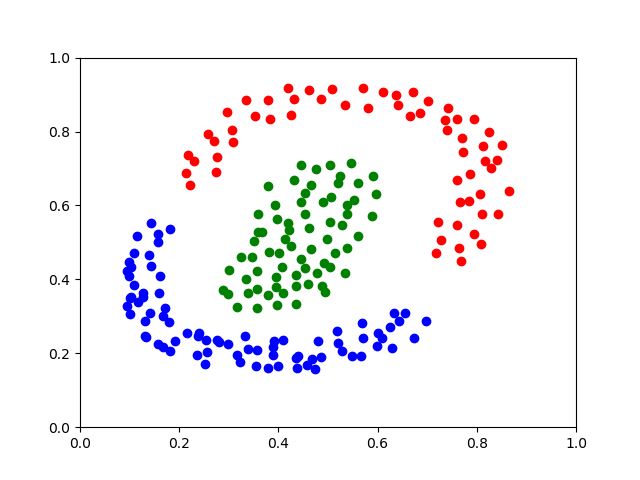

num_of_cls= 3
num_of_ins= 2
hcenters:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1.]
outweights:
 [[0.3930496  0.53213753 0.60631392]
 [0.16009568 0.28586238 0.41233268]
 [0.34029704 0.76014303 0.89207699]
 [0.69941061 0.06218935 0.15970131]
 [0.52516925 0.68793826 0.04430742]]
outbiases:
 [0.2315864  0.51198658 0.00739885]
houtputs:
 [[0.57627172 0.57627172 0.57627172 0.57627172 0.57627172]
 [0.50115091 0.50115091 0.50115091 0.50115091 0.50115091]
 [0.43041217 0.43041217 0.43041217 0.43041217 0.43041217]
 ...
 [0.9015534  0.9015534  0.9015534  0.9015534  0.9015534 ]
 [0.87590293 0.87590293 0.87590293 0.87590293 0.87590293]
 [0.87892474 0.87892474 0.87892474 0.87892474 0.87892474]]
netoutputs:
 [[1.45214268 1.85370305 1.22605927]
 [1.29303515 1.67880149 1.06719888]
 [1.14320892 1.51410255 0.91760537]
 [1.09513139 1.46125254 0.86960252]
 [0.97607534 1.33037823 0.7507314 ]
 [0.94877726 1.30037037 0.72347572]
 [0.82451975 1.16377827 0.59941121]
 [0.87394197 1.21

<IPython.core.display.Javascript object>


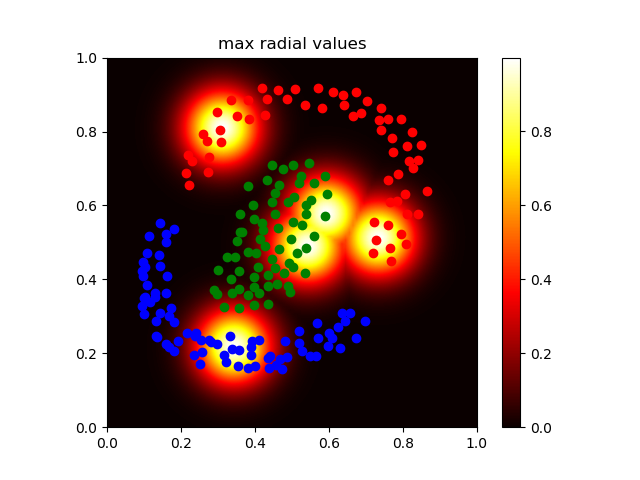

In [5]:
#!/usr/bin/env python
%matplotlib notebook
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        return self.netoutputs
    def GetPredictions(self):#returns class labels as 0,1,2,...
        return np.argmax(self.netoutputs, axis=1)
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())  
    def GetMSE(self, d):
        self.mse = ((self.netoutputs - d)*(self.netoutputs - d)).sum(axis=1).sum() /d.shape[0]
        return self.mse       
    def GetMaxRadialValue(self, X):#helper function for vizualization; for each example (row in X) returns the maximum value of any of the radial functions
        self.Forward(X)
        return self.houtputs.max(axis=1)
    def InitCenters(self, inputs, sigma):#randomly select a self.hidden_num number of training examples and copy their positions as centres of rbf neurons
        self.hsigmas = np.ones(self.hidden_num)*sigma
        indxs = set()
        while len(indxs) < self.hcenters.shape[0]:
            indxs.add(np.random.randint(0,inputs.shape[0]))
        self.hcenters = inputs[np.asarray(list(indxs)), :].copy()
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        pass
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
###############################################################################
###############################################################################        
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels
###############################################################################        
X = np.loadtxt('data_3classes_nonlinear_2D.txt')
#print('X=',X)

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
#plt.show()

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

#experiment with the values of hidden_num and sigma, so that the training data is well covered by radial responses
hidden_num = 5 #experiment with this value
sigma = 0.1 #experiment with this value

net = RBFNN(num_of_ins, hidden_num, num_of_cls)
net.Forward(X)
net.Print()

#no training
net.InitCenters(X, sigma)
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
Z = net.GetMaxRadialValue( np.hstack((xx, yy)) ).reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('max radial values')
##########################################################################
plt.show()


### RBF network - train the output layer's weights using matrix pseudo-inverse

Experiment with different numbers of hidden radial neurons and sigma values.

<IPython.core.display.Javascript object>


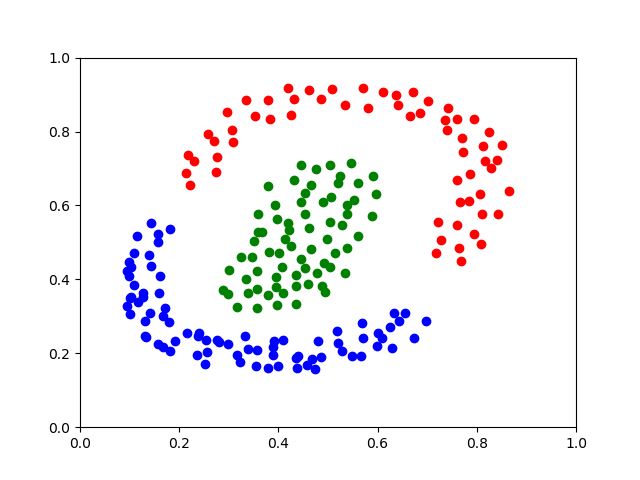

num_of_cls= 3
num_of_ins= 2
hcenters:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

MSE after training= 990.5871801630275
Classification error after training= 179
houts max= 0.9244301570120415
out w max= 0.9985971245194555
out w min= 0.0034920813019125863


<IPython.core.display.Javascript object>


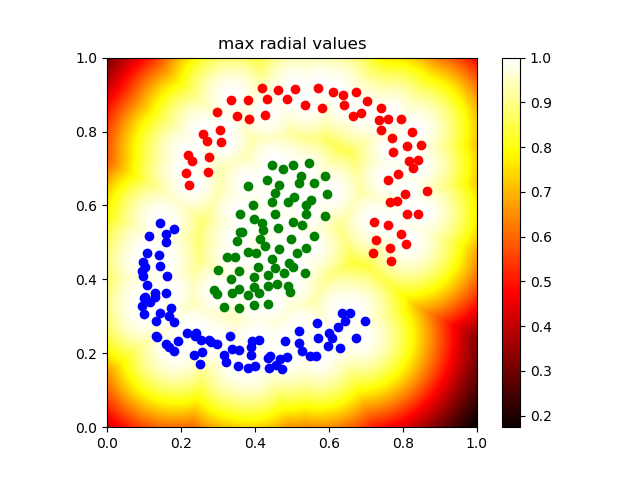

<IPython.core.display.Javascript object>


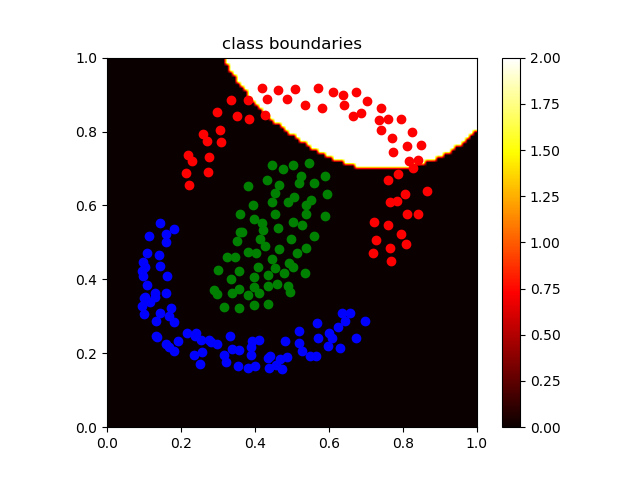

In [5]:
#!/usr/bin/env python
%matplotlib notebook
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        return self.netoutputs
    def GetPredictions(self):#returns class labels as 0,1,2,...
        return np.argmax(self.netoutputs, axis=1)
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())  
    def GetMSE(self, d):
        self.mse = ((self.netoutputs - d)*(self.netoutputs - d)).sum(axis=1).sum() /d.shape[0]
        return self.mse       
    def GetMaxRadialValue(self, X):#helper function for vizualization; for each example (row in X) returns the maximum value of any of the radial functions
        self.Forward(X)
        return self.houtputs.max(axis=1)
    def InitCenters(self, inputs, sigma):#randomly select a self.hidden_num number of training examples and copy their positions as centres of rbf neurons
        self.hsigmas = np.ones(self.hidden_num)*sigma
        indxs = set()
        while len(indxs) < self.hcenters.shape[0]:
            indxs.add(np.random.randint(0,inputs.shape[0]))
        self.hcenters = inputs[np.asarray(list(indxs)), :].copy()
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        self.InitCenters(X, sigma)
        self.Forward(X)
        #now the matrix pseudoinverse for the weights of the output linear neurons
        r = np.hstack((np.ones((self.houtputs.shape[0], 1)), self.houtputs))
        w = np.dot(np.dot( np.linalg.inv( np.dot(r.T, r) ), r.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model
        pass
###############################################################################
###############################################################################        
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels
###############################################################################        
X = np.loadtxt('data_3classes_nonlinear_2D.txt')
#print('X=',X)

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
#plt.show()

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

net = RBFNN(num_of_ins, 100, num_of_cls)
net.Print()
net.Forward(X)
net.Print()
print('MSE before training=',net.GetMSE(dtrain))
print('Classification error before training=',net.GetClassificationError(d))


sigma = 0.3
net.TrainMPInv(X, dtrain, sigma)

net.Forward(X)
#net.Print()
print('MSE after training=',net.GetMSE(dtrain))
print('Classification error after training=',net.GetClassificationError(d))
print('houts max=',net.houtputs.max(axis=1).min())
print('out w max=',net.outweights.max())
print('out w min=',net.outweights.min())


##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
Z = net.GetMaxRadialValue( np.hstack((xx, yy)) ).reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('max radial values')
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
net.Forward(np.hstack((xx, yy)))
Z = net.GetPredictions().reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('class boundaries')
##########################################################################
plt.show()



### RBF network - train the output layer's weights using iterative algorithm (Widrow-Hoff, delta rule)

Note the division in:

```
self.outweights += eta*np.dot(self.houtputs.T, d - self.netoutputs)/X.shape[0]
self.outbiases += eta*np.dot(np.ones((1,self.houtputs.shape[0])), d - self.netoutputs).flatten()/X.shape[0]
```

The devision is done to avoid too strong gradients, when the number of training examples is huge.



<IPython.core.display.Javascript object>


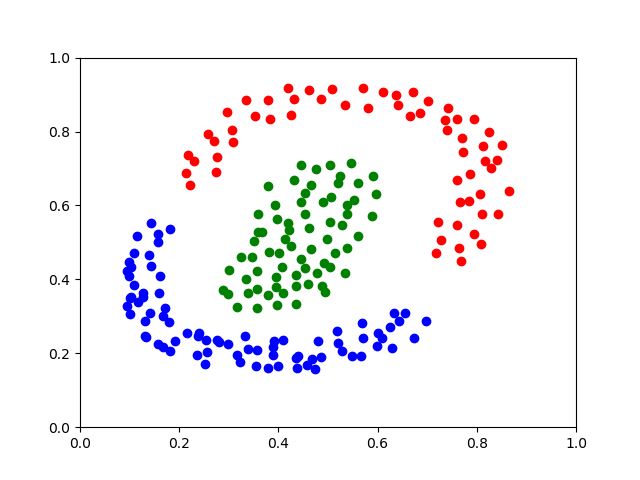

num_of_cls= 3
num_of_ins= 2
hcenters:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

mse= 2.4889294050256856
classification_error= 41

mse= 2.370251191896704
classification_error= 38

mse= 2.2645911893557877
classification_error= 37

mse= 2.170191247677852
classification_error= 36

mse= 2.085542581744409
classification_error= 33

mse= 2.009349939136079
classification_error= 33

mse= 1.940500937856673
classification_error= 32

mse= 1.87803982679132
classification_error= 32

mse= 1.8211450299683172
classification_error= 31

mse= 1.7691099280512481
classification_error= 24

mse= 1.721326409491637
classification_error= 24

mse= 1.6772707913537677
classification_error= 24

mse= 1.6364917676339468
classification_error= 22

mse= 1.5986000923491517
classification_error= 22

mse= 1.5632597469732277
classification_error= 21

mse= 1.5301803779863117
classification_error= 19

mse= 1.4991108212591953
classification_error= 17

mse= 1.469833556475394
classification_error= 16

mse= 1.4421599574466768
classification_error= 15

mse= 1.415926223556313
classification_error= 14

mse= 1.390

 [[ 0.50534025 -0.55409601 -0.83847276]
 [ 1.59231458 -0.38244411 -0.37728487]
 [ 0.93759236 -0.89115861 -0.62356381]
 [ 0.99294979 -0.93052015 -0.59872383]
 [ 0.95223727 -0.91439612 -1.03387769]
 [ 0.94752038 -0.79615507 -1.10990929]
 [ 0.9869445  -0.66575743 -0.70530704]
 [ 0.95969203 -0.59922447 -0.82130302]
 [ 1.030081   -0.85099369 -0.77635846]
 [ 1.12372249 -0.93591802 -0.81918558]
 [ 1.40830496 -0.58624431 -0.67129132]
 [ 0.83193952 -0.60558013 -0.78445905]
 [-0.43966518 -1.33080193 -1.40884525]
 [-0.82298007 -1.47094727 -1.48071385]
 [-0.51160017 -1.20892891 -1.31639473]
 [ 1.38741423 -0.35555924 -0.53638123]
 [ 1.09633427 -0.87171385 -0.87429231]
 [ 0.73999329 -1.17617193 -1.12634185]
 [ 1.10568285 -0.89730719 -0.89882283]
 [ 0.93678483 -0.70294979 -0.72864382]
 [ 0.84430204 -0.63551406 -0.8011878 ]
 [ 0.95671294 -0.55479866 -0.93088121]
 [ 0.98413865 -0.7216347  -1.07263726]
 [ 0.6307717  -1.15250298 -1.08239723]
 [ 0.72854275 -1.1501251  -0.89136541]
 [ 0.7324567  -1.0863116

<IPython.core.display.Javascript object>


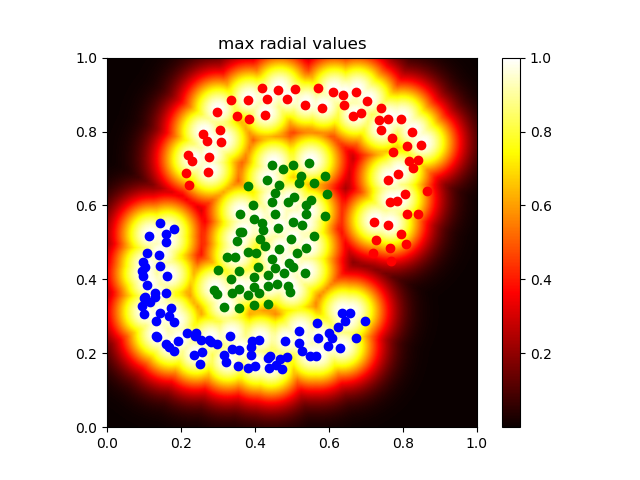

<IPython.core.display.Javascript object>


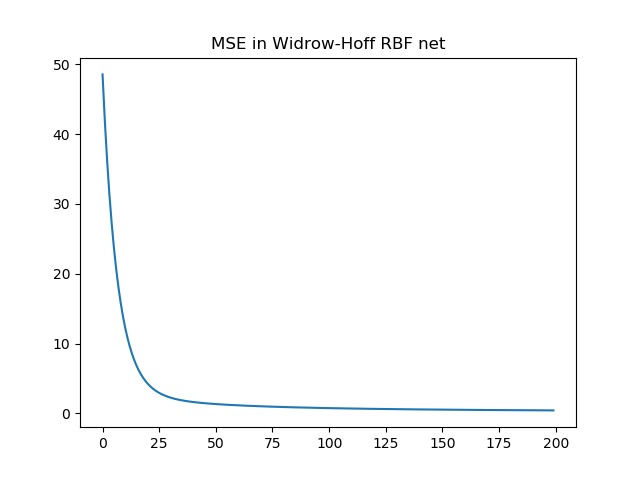

<IPython.core.display.Javascript object>


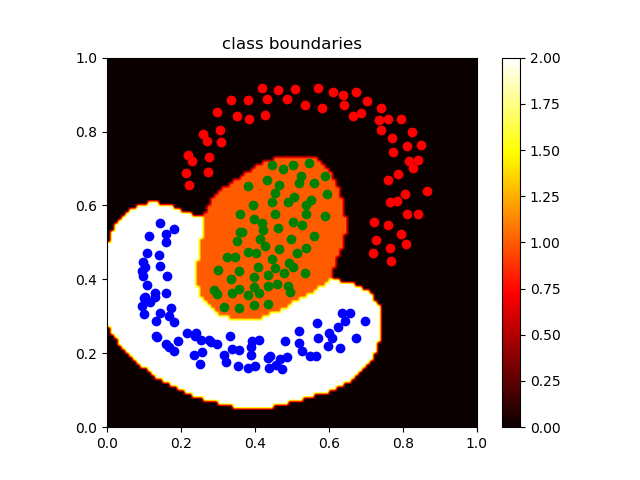

In [6]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        return self.netoutputs
    def GetPredictions(self):#returns class labels as 0,1,2,...
        return np.argmax(self.netoutputs, axis=1)
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())  
    def GetMSE(self, d):
        self.mse = ((self.netoutputs - d)*(self.netoutputs - d)).sum(axis=1).sum() /d.shape[0]
        return self.mse       
    def GetMaxRadialValue(self, X):#helper function for vizualization; for each example (row in X) returns the maximum value of any of the radial functions
        self.Forward(X)
        return self.houtputs.max(axis=1)
    def InitCenters(self, inputs, sigma):#randomly select a self.hidden_num number of training examples and copy their positions as centres of rbf neurons
        self.hsigmas = np.ones(self.hidden_num)*sigma
        indxs = set()
        while len(indxs) < self.hcenters.shape[0]:
            indxs.add(np.random.randint(0,inputs.shape[0]))
        self.hcenters = inputs[np.asarray(list(indxs)), :].copy()
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        self.InitCenters(X, sigma)
        self.Forward(X)
        #now the matrix pseudoinverse for the weights of the output linear neurons
        r = np.hstack((np.ones((self.houtputs.shape[0], 1)), self.houtputs))
        w = np.dot(np.dot( np.linalg.inv( np.dot(r.T, r) ), r.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model, delta rule
        self.InitCenters(X, sigma)
        self.Forward(X)
        self.stats = []
        for i in range(max_iters):
            self.outweights += eta*np.dot(self.houtputs.T, d - self.netoutputs)/X.shape[0]
            self.outbiases += eta*np.dot(np.ones((1,self.houtputs.shape[0])), d - self.netoutputs).flatten()/X.shape[0]
            self.Forward(X)
            mse = self.GetMSE(d)
            self.stats.append(mse)
            print('mse=',mse)
            classification_error = self.GetClassificationError(labels)
            print('classification_error=',classification_error)
            print()            
###############################################################################
###############################################################################        
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels
###############################################################################        
X = np.loadtxt('data_3classes_nonlinear_2D.txt')
#print('X=',X)

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
#plt.show()

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

#experiment with the values of hidden_num and sigma, so that the training data is well covered by radial responses
hidden_num = 100 #experiment with this value
sigma = 0.1 #experiment with this value

net = RBFNN(num_of_ins, hidden_num, num_of_cls)
net.Print()
net.Forward(X)
net.Print()
print('MSE before training=',net.GetMSE(dtrain))
print('Classification error before training=',net.GetClassificationError(d))

net.TrainBatch(X, dtrain, d, sigma, 0.05, 200)

net.Forward(X)
net.Print()
print('MSE after training=',net.GetMSE(dtrain))
print('Classification error after training=',net.GetClassificationError(d))
print('houts max=',net.houtputs.max(axis=1).min())
print('out w max=',net.outweights.max())
print('out w min=',net.outweights.min())


##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
Z = net.GetMaxRadialValue( np.hstack((xx, yy)) ).reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('max radial values')
##########################################################################
if net.stats != None:
    plt.figure()
    plt.title('MSE in Widrow-Hoff RBF net')
    plt.plot(net.stats)
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
net.Forward(np.hstack((xx, yy)))
Z = net.GetPredictions().reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('class boundaries')
##########################################################################
plt.show()


### Task 1

- Use the previous example code.

- Experiment with different settings: number of hidden neurons, number of epoch, eta and sigma values. 

- What is the minimum number of hidden units you can find, so that the learning is still possible? What are the settings?

- Write your answers and comments below.

### YOUR ANSWERS GO IN THIS CELL


My results are as follows ...

<IPython.core.display.Javascript object>


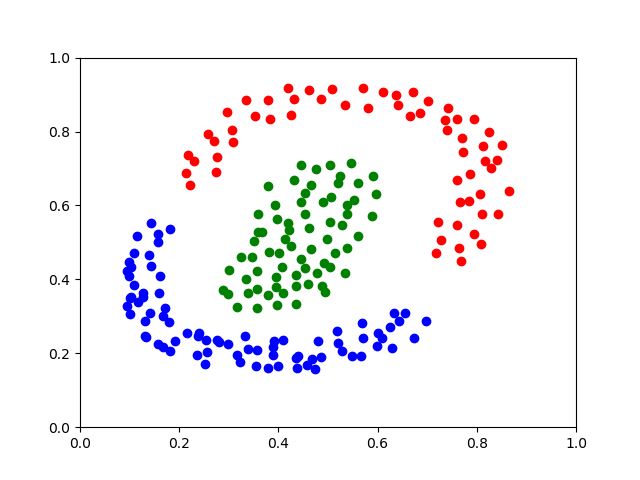

num_of_cls= 3
num_of_ins= 2
hcenters:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
outweights:
 [[0.10398906 0.03284163 0.93957852]
 [0.87147132 0.84752067 0.70298617]
 [0.37437713 0.42276632 0.79549267]
 [0.4105865  0.8870987  0.20967909]
 [0.96983931 0.10142913 0.50600105]
 [0.84310793 0.76823884 0.1988187 ]
 [0.82044164 0.6627408  0.6991337 ]
 [0.23226277 0.97045177 0.05245647]
 [0.12545799 0.83259935 0.48149492]
 [0.55872689 0.05687565 0.88381012]
 [0.30240787 0.66586124 0.02481305]
 [0.93520852 0.62163345 0.06809679]
 [0.94027077 0.89664102 0.95736702]
 [0.05144437 0.40540023 0.78243817]
 [0.38393806 0.59454841 0.97350567]]
outbiases:
 [0.62166503 0.78629275 0.95521636]
hcenters:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
hsigmas:
 [1. 1. 1. 

classification_error= 50

mse= 2.051952785291528
classification_error= 48

mse= 2.010956358436067
classification_error= 46

mse= 1.9728412302836653
classification_error= 44

mse= 1.9372923182288253
classification_error= 44

mse= 1.9040328442494878
classification_error= 42

mse= 1.8728195761883109
classification_error= 41

mse= 1.8434386628887849
classification_error= 41

mse= 1.8157019890051926
classification_error= 39

mse= 1.7894439845737187
classification_error= 38

mse= 1.764518832542246
classification_error= 36

mse= 1.7407980245532664
classification_error= 34

mse= 1.7181682214844713
classification_error= 33

mse= 1.6965293806857975
classification_error= 33

mse= 1.675793116606919
classification_error= 32

mse= 1.6558812656702524
classification_error= 31

mse= 1.6367246298856923
classification_error= 30

mse= 1.6182618768895136
classification_error= 30

mse= 1.6004385768779912
classification_error= 30

mse= 1.5832063593460193
classification_error= 29

mse= 1.5665221746759503
clas

mse= 0.6925448587468397
classification_error= 7

mse= 0.6909683309928688
classification_error= 7

mse= 0.6894034594272996
classification_error= 7

mse= 0.6878500892362022
classification_error= 7

mse= 0.6863080683267977
classification_error= 7

mse= 0.6847772472728796
classification_error= 7

mse= 0.6832574792614341
classification_error= 7

mse= 0.6817486200404324
classification_error= 7

mse= 0.6802505278677633
classification_error= 7

mse= 0.6787630634612845
classification_error= 7

mse= 0.6772860899499596
classification_error= 7

mse= 0.6758194728260621
classification_error= 7

mse= 0.6743630798984162
classification_error= 7

mse= 0.6729167812466516
classification_error= 7

mse= 0.6714804491764493
classification_error= 7

mse= 0.6700539581757542
classification_error= 7

mse= 0.6686371848719329
classification_error= 7

mse= 0.6672300079898532
classification_error= 7

mse= 0.6658323083108638
classification_error= 7

mse= 0.6644439686326565
classification_error= 7

mse= 0.6630648737299

<IPython.core.display.Javascript object>


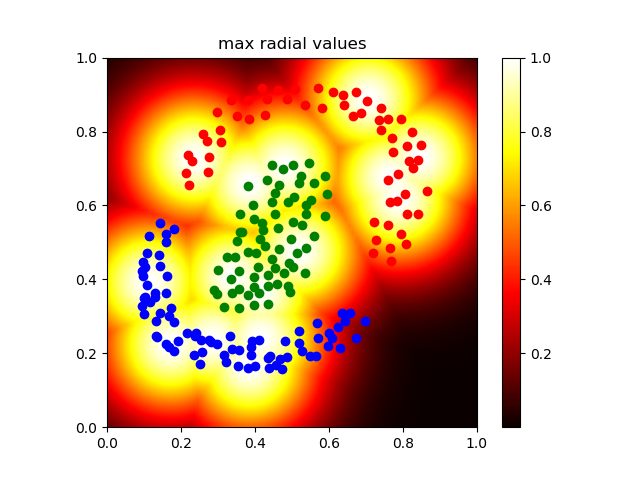

<IPython.core.display.Javascript object>


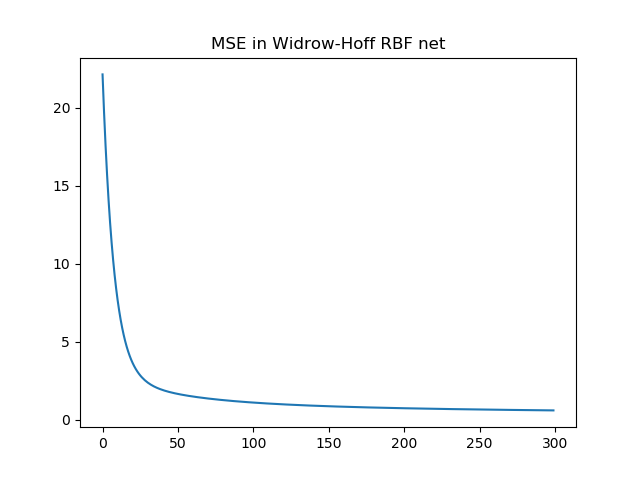

<IPython.core.display.Javascript object>


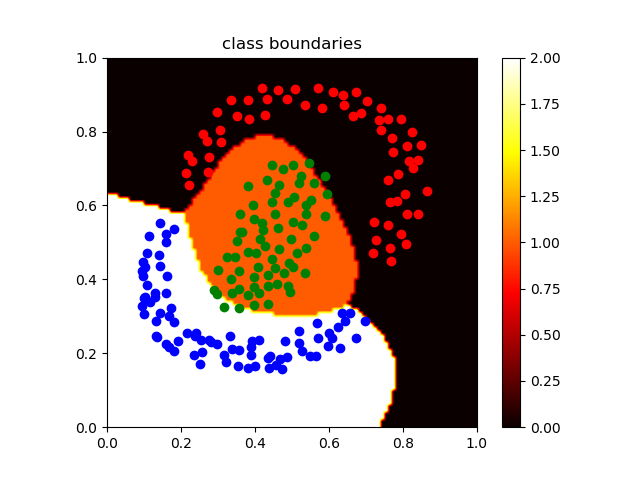

In [7]:
#!/usr/bin/env python
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation


###############################################################################
class RBFNN:
    def __init__(self, inputs_num, hidden_num, output_num):#hidden_num=number of radial neurons in the hidden layer
        self.inputs_num = inputs_num
        self.hidden_num = hidden_num
        self.output_num = output_num
        self.hcenters = np.zeros((hidden_num, inputs_num)) #centres of radial functions in the hidden layer
        self.hsigmas = np.ones(hidden_num)#sigma values of radial functions in the hidden layer
        self.outweights = np.random.rand(hidden_num, output_num) #each output neuron as a column
        self.outbiases = np.random.rand(output_num)#biases of the output linear neurons
        self.houtputs = None #outputs of radial neurons (hidden layer)
        self.netoutputs = None #output of the network (linear neurons)
        self.stats = None #statistics about the MSE during batch training
    def Print(self):#print basic info about the network
        print('hcenters:\n',self.hcenters)
        print('hsigmas:\n',self.hsigmas)
        print('outweights:\n', self.outweights)
        print('outbiases:\n',self.outbiases)        
        if self.houtputs is not None:
            print('houtputs:\n',self.houtputs)
        if self.netoutputs is not None:
            print('netoutputs:\n',self.netoutputs)  
    def Forward(self, inputs):
        ##outputs of radial neurons (hidden layer)
        self.houtputs = np.empty((inputs.shape[0], self.hcenters.shape[0]), dtype = float)
        for i in range(inputs.shape[0]): #for each training example
            self.houtputs[i,:] = np.exp(-np.sum((self.hcenters - inputs[i,:])**2, axis=1)/self.hsigmas**2)
        ##outputs of linear neurons (output layer)
        self.netoutputs = np.dot(self.houtputs, self.outweights) + self.outbiases
    def GetOutputs(self):#returns real valued outputs
        return self.netoutputs
    def GetPredictions(self):#returns class labels as 0,1,2,...
        return np.argmax(self.netoutputs, axis=1)
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())  
    def GetMSE(self, d):
        self.mse = ((self.netoutputs - d)*(self.netoutputs - d)).sum(axis=1).sum() /d.shape[0]
        return self.mse       
    def GetMaxRadialValue(self, X):#helper function for vizualization; for each example (row in X) returns the maximum value of any of the radial functions
        self.Forward(X)
        return self.houtputs.max(axis=1)
    def InitCenters(self, inputs, sigma):#randomly select a self.hidden_num number of training examples and copy their positions as centres of rbf neurons
        self.hsigmas = np.ones(self.hidden_num)*sigma
        indxs = set()
        while len(indxs) < self.hcenters.shape[0]:
            indxs.add(np.random.randint(0,inputs.shape[0]))
        self.hcenters = inputs[np.asarray(list(indxs)), :].copy()
    def TrainMPInv(self, X, d, sigma): #matrix pseudo inverse
        self.InitCenters(X, sigma)
        self.Forward(X)
        #now the matrix pseudoinverse for the weights of the output linear neurons
        r = np.hstack((np.ones((self.houtputs.shape[0], 1)), self.houtputs))
        w = np.dot(np.dot( np.linalg.inv( np.dot(r.T, r) ), r.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]
    def TrainBatch(self, X, d, labels, sigma, eta, max_iters): #Widrow-Hoff model, delta rule
        self.InitCenters(X, sigma)
        self.Forward(X)
        self.stats = []
        for i in range(max_iters):
            self.outweights += eta*np.dot(self.houtputs.T, d - self.netoutputs)/X.shape[0]
            self.outbiases += eta*np.dot(np.ones((1,self.houtputs.shape[0])), d - self.netoutputs).flatten()/X.shape[0]
            self.Forward(X)
            mse = self.GetMSE(d)
            self.stats.append(mse)
            print('mse=',mse)
            classification_error = self.GetClassificationError(labels)
            print('classification_error=',classification_error)
            print()            
###############################################################################
###############################################################################        
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels
###############################################################################        
X = np.loadtxt('data_3classes_nonlinear_2D.txt')
#print('X=',X)

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
#plt.show()

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

#experiment with the values of hidden_num and sigma, so that the training data is well covered by radial responses
hidden_num = 15 #experiment with this value
sigma = 0.2 #experiment with this value

net = RBFNN(num_of_ins, hidden_num, num_of_cls)
net.Print()
net.Forward(X)
net.Print()
print('MSE before training=',net.GetMSE(dtrain))
print('Classification error before training=',net.GetClassificationError(d))

net.TrainBatch(X, dtrain, d, sigma, 0.04, 300)

net.Forward(X)
net.Print()
print('MSE after training=',net.GetMSE(dtrain))
print('Classification error after training=',net.GetClassificationError(d))
print('houts max=',net.houtputs.max(axis=1).min())
print('out w max=',net.outweights.max())
print('out w min=',net.outweights.min())


##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
Z = net.GetMaxRadialValue( np.hstack((xx, yy)) ).reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('max radial values')
##########################################################################
if net.stats != None:
    plt.figure()
    plt.title('MSE in Widrow-Hoff RBF net')
    plt.plot(net.stats)
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
net.Forward(np.hstack((xx, yy)))
Z = net.GetPredictions().reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('class boundaries')
##########################################################################
plt.show()


### Task 2

- Use the RBF network for iris dataset.

- Find the best settings (number of hidden neurons, sigma values, eta and epochs)

- What are the best results (classification rates)?

- Does the matrix psudo-inverse work for this data?

- Remeber about normalizing the inputs

### YOUR ANSWERS AND COMMENTS HERE

My results are as follows ...

In [8]:
###############################################################################        
X = np.loadtxt('iris.csv', dtype = "float", delimiter=None, usecols=[0,1,2,3])
d = np.loadtxt('iris.csv', dtype = "U20", delimiter=None, usecols=[4])
#print('X=',X)

for i in range(len(d)):
    if d[i]=='Iris-setosa':
        d[i] = 0
    elif d[i]=='Iris-versicolor':
        d[i] = 1
    elif d[i]=='Iris-virginica':
        d[i] = 2
        
d = d.astype(int)

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
#plt.show()

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

#experiment with the values of hidden_num and sigma, so that the training data is well covered by radial responses
hidden_num = 15 #experiment with this value
sigma = 0.2 #experiment with this value

net = RBFNN(num_of_ins, hidden_num, num_of_cls)
net.Print()
net.Forward(X)
net.Print()
print('MSE before training=',net.GetMSE(dtrain))
print('Classification error before training=',net.GetClassificationError(d))

net.TrainBatch(X, dtrain, d, sigma, 0.04, 300)

net.Forward(X)
net.Print()
print('MSE after training=',net.GetMSE(dtrain))
print('Classification error after training=',net.GetClassificationError(d))
print('houts max=',net.houtputs.max(axis=1).min())
print('out w max=',net.outweights.max())
print('out w min=',net.outweights.min())


##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
Z = net.GetMaxRadialValue( np.hstack((xx, yy)) ).reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('max radial values')
##########################################################################
if net.stats != None:
    plt.figure()
    plt.title('MSE in Widrow-Hoff RBF net')
    plt.plot(net.stats)
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.01 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
net.Forward(np.hstack((xx, yy)))
Z = net.GetPredictions().reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('class boundaries')
##########################################################################
plt.show()#YOUR CODE HERE

<IPython.core.display.Javascript object>

num_of_cls= 3
num_of_ins= 4
hcenters:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
outweights:
 [[0.69912518 0.15655362 0.49107003]
 [0.52797047 0.64388271 0.23759693]
 [0.36311273 0.34465334 0.66238235]
 [0.06570438 0.40532414 0.72485155]
 [0.4322901  0.27806409 0.8681296 ]
 [0.06912271 0.96754566 0.41294676]
 [0.52032022 0.69521941 0.4545693 ]
 [0.5673827  0.84849787 0.71936784]
 [0.88339645 0.24020336 0.79782077]
 [0.22966997 0.25705451 0.34219559]
 [0.40380995 0.56463812 0.13603954]
 [0.63294493 0.25089981 0.70603347]
 [0.97711403 0.26126794 0.59308077]
 [0.50103673 0.10841984 0.81656551]
 [0.32580729 0.79536077 0.40485908]]
outbiases:
 [0.8579787  0.77282074 0.13510407]
hcenters:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0

mse= 2.9372478680620406
classification_error= 125

mse= 2.9309486399145936
classification_error= 125

mse= 2.925090357358325
classification_error= 125

mse= 2.9196384100069683
classification_error= 125

mse= 2.9145609079138537
classification_error= 124

mse= 2.9098284677366437
classification_error= 124

mse= 2.9054140157102166
classification_error= 124

mse= 2.9012926061065034
classification_error= 124

mse= 2.8974412539639776
classification_error= 124

mse= 2.893838780965137
classification_error= 124

mse= 2.890465673428518
classification_error= 124

mse= 2.887303951462991
classification_error= 124

mse= 2.8843370484069486
classification_error= 124

mse= 2.881549699743968
classification_error= 124

mse= 2.878927840750051
classification_error= 124

mse= 2.8764585121861272
classification_error= 124

mse= 2.8741297734034297
classification_error= 124

mse= 2.8719306222790606
classification_error= 124

mse= 2.869850921444891
classification_error= 124

mse= 2.8678813303150954
classification

classification_error= 104

mse= 2.741266276405372
classification_error= 104

mse= 2.740681693427875
classification_error= 104

mse= 2.7400976364160448
classification_error= 104

mse= 2.739514104856593
classification_error= 104

mse= 2.738931098237069
classification_error= 103

mse= 2.738348616045829
classification_error= 103

mse= 2.737766657772016
classification_error= 103

mse= 2.737185222905539
classification_error= 103

mse= 2.73660431093705
classification_error= 103

mse= 2.736023921357929
classification_error= 103

mse= 2.735444053660261
classification_error= 103

mse= 2.7348647073368273
classification_error= 103

mse= 2.734285881881087
classification_error= 103

mse= 2.7337075767871624
classification_error= 101

mse= 2.7331297915498314
classification_error= 101

mse= 2.732552525664508
classification_error= 101

mse= 2.7319757786272416
classification_error= 101

mse= 2.7313995499346984
classification_error= 100

mse= 2.7308238390841577
classification_error= 100

mse= 2.7302486455

<IPython.core.display.Javascript object>

ValueError: operands could not be broadcast together with shapes (15,4) (2,) 

### Task 3

- Use the RBF network for pima-diabetes dataset. There are two classes, the last column indicates the class.

- Find the best settings (number of hidden neurons, sigma values, eta and epochs)

- What are the best results (classification rates)?

- Does the matrix psudo-inverse work for this data?

- Use also MCPerceptron class (or your implementation of Widrow-Hoff model) as a linear model. Compare the results.

### YOUR ANSWERS AND COMMENTS HERE

My results are as follows ...

In [11]:
X = np.loadtxt('pima-diabetes.csv', dtype='str', delimiter=',')
    
classes = set(X[:,-1])
for clsname, clsindx in zip(classes, range(len(classes))):
    print(clsname, clsindx)
    X[X==clsname] = clsindx
labels = X[:,-1].astype('int32')
X = X[:,:-1].astype(np.float)

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

#experiment with the values of hidden_num and sigma, so that the training data is well covered by radial responses
hidden_num = 15 #experiment with this value
sigma = 0.2 #experiment with this value

net = RBFNN(num_of_ins, hidden_num, num_of_cls)
net.Print()
net.Forward(X)
net.Print()
print('MSE before training=',net.GetMSE(dtrain))
print('Classification error before training=',net.GetClassificationError(d))

net.TrainBatch(X, dtrain, d, sigma, 0.04, 300)

net.Forward(X)
net.Print()
print('MSE after training=',net.GetMSE(dtrain))
print('Classification error after training=',net.GetClassificationError(d))
print('houts max=',net.houtputs.max(axis=1).min())
print('out w max=',net.outweights.max())
print('out w min=',net.outweights.min())


##########################################################################

1 0
0 1
num_of_cls= 3
num_of_ins= 8
hcenters:
 [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
hsigmas:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
outweights:
 [[0.20854228 0.27198768 0.9306721 ]
 [0.01795699 0.81170377 0.93896706]
 [0.42653165 0.58183896 0.69592619]
 [0.95462482 0.73509731 0.83730416]
 [0.22699432 0.93131562 0.50218728]
 [0.01126418 0.83711049 0.39706813]
 [0.79562628 0.05004708 0.34057666]
 [0.94990489 0.51111462 0.79489687]
 [0.56073526 0.3909318  0.91317028]
 [0.53577076 0.94815026 0.74885513]
 [0.94740205 0.91884595 0.73646514]
 [0.18199245 0.27923722 0.61585607]
 [0.926013   0.20725542 0.10414325]
 [0.62141

ValueError: operands could not be broadcast together with shapes (768,3) (150,3) 